In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


the link to my cleaned dataset if needed: https://drive.google.com/file/d/1ZblKtzd2uXB7ogrN4pCAMi28g1LwkcjB/view?usp=drive_link

In [ ]:
#Importing all neccessary libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from scipy.stats import pointbiserialr

# <span style="font-size:40pt"><b>Initial EDA with Pandas</b></span>

In [ ]:
#Loading the dataset:

df = pd.read_csv('/content/drive/MyDrive/cleaned_dataset.csv')
df

,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes
0,R20IRE5X6WY351,B085296FLT,5.0 out of 5 stars Great headphones!,Talia Calazans,5,"I love these headphones, and I wear them all t...","Reviewed in the United States June 1, 2024",AG6TODKB7VQYDH7KJ2MKHF6RQEGA,True,7,Color: Shadow GraySet: Studio3
1,RFGOLBEISEB55,B085296FLT,5.0 out of 5 stars Great Headphones!,Leosha Williams,5,These headphones are absolutely amazing! The v...,"Reviewed in the United States June 1, 2024",AFBT2YGFVT6CBITOKGANUEJ5WYHA,True,8,Color: Shadow GraySet: Studio3
2,R2399XIITPW93N,B085296FLT,5.0 out of 5 stars Works great,Max Rundell,5,They are sleek and great value for the money y...,"Reviewed in the United States June 18, 2024",AGONEWJIIDADSFNMIJQESOKWVG3A,True,1,Color: Matte BlackSet: Studio3
3,R1S3QWGEJLIK7Q,B085296FLT,5.0 out of 5 stars amazing headphones,N/a,5,"great headphones, often have very significant ...","Reviewed in the United States June 21, 2024",AGVMWTJXVGQBYWLPQAHT3YPKMC2Q,True,1,Color: Matte BlackSet: Studio3
4,R2T8PKNM1Q1XQK,B085296FLT,5.0 out of 5 stars Whew!,I Allen,5,Perfect size and the case is sturdy. Volume co...,"Reviewed in the United States June 7, 2024",AH772ZEXHMF27UGEAYNKXL6I4OPA,True,1,Color: Shadow GraySet: Studio3
...,...,...,...,...,...,...,...,...,...,...,...
1195,R3OXSZT5T74ZFF,B0CCBKGDJD,5.0 out of 5 stars Worth the $,Amazon Customer,5,Great gift. Purchased for my teenager and they...,"Reviewed in the United States May 13, 2024",AFPZBBH7J6HUAKTHJP7ZH6U5QTIQ,True,0,Color: Rose GoldStyle: Solo3Set: Without Apple...
1196,R1ZAEIMTC3EZGP,B0CCBKGDJD,"5.0 out of 5 stars Good sound, comfortable",Renocoyote,5,I liked the simplicity of set up and use. The ...,"Reviewed in the United States April 16, 2024",AF7Q4FXIHM2GQ52KKY5F4OOVWNRQ,True,1,Color: SilverStyle: Solo3Set: Without AppleCare+
1197,R35OTVSHNLWLNM,B0CCBKGDJD,5.0 out of 5 stars Beats for the win!,Amazon Customer,5,The seller got my order to me fast and the hea...,"Reviewed in the United States April 24, 2024",AEGMNVXBMCTAG3EI7HIUZSPAMQ3Q,True,0,Color: BlackStyle: Solo3Set: Without AppleCare+
1198,R1TSFDSW55DPVP,B0CCBKGDJD,"5.0 out of 5 stars Sound quality, built qualit...",Chee Pu,5,"Love it, the sound quality and build quality i...","Reviewed in the United States April 23, 2024",AH27S3TR56YMQ6SCFB2H7CEG2WYQ,True,0,Color: BlackStyle: Solo3Set: Without AppleCare+


In [ ]:
#Displaying the first few rows:

df.head()

,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes
0,R20IRE5X6WY351,B085296FLT,5.0 out of 5 stars Great headphones!,Talia Calazans,5,"I love these headphones, and I wear them all t...","Reviewed in the United States June 1, 2024",AG6TODKB7VQYDH7KJ2MKHF6RQEGA,True,7,Color: Shadow GraySet: Studio3
1,RFGOLBEISEB55,B085296FLT,5.0 out of 5 stars Great Headphones!,Leosha Williams,5,These headphones are absolutely amazing! The v...,"Reviewed in the United States June 1, 2024",AFBT2YGFVT6CBITOKGANUEJ5WYHA,True,8,Color: Shadow GraySet: Studio3
2,R2399XIITPW93N,B085296FLT,5.0 out of 5 stars Works great,Max Rundell,5,They are sleek and great value for the money y...,"Reviewed in the United States June 18, 2024",AGONEWJIIDADSFNMIJQESOKWVG3A,True,1,Color: Matte BlackSet: Studio3
3,R1S3QWGEJLIK7Q,B085296FLT,5.0 out of 5 stars amazing headphones,N/a,5,"great headphones, often have very significant ...","Reviewed in the United States June 21, 2024",AGVMWTJXVGQBYWLPQAHT3YPKMC2Q,True,1,Color: Matte BlackSet: Studio3
4,R2T8PKNM1Q1XQK,B085296FLT,5.0 out of 5 stars Whew!,I Allen,5,Perfect size and the case is sturdy. Volume co...,"Reviewed in the United States June 7, 2024",AH772ZEXHMF27UGEAYNKXL6I4OPA,True,1,Color: Shadow GraySet: Studio3


In [ ]:
#Providing descriptive statistics (mean, median, mode, variance, standard deviation):

#Calculating measures of central tendency for Rating column
mean_rating = df['rating'].mean()
median_rating = df['rating'].median()
mode_rating = df['rating'].mode()

#Calculating measures of data dispersion for Rating column
variance_rating = df['rating'].var()
std_rating = df['rating'].std()

#Calculating measures of data distribution for Rating column
quantiles_rating = df['rating'].quantile([0.25, 0.5, 0.75])

print("Mean Rating:", mean_rating)
print("Median Rating:", median_rating)
print("Mode Rating:", mode_rating)
print("Variance Rating:", variance_rating)
print("Standard Deviation Rating:", std_rating)
print("Quantiles Rating:", quantiles_rating)


Mean Rating: 4.574166666666667
Median Rating: 5.0
Mode Rating: 0    5
Name: rating, dtype: int64
Variance Rating: 0.4498742007228246
Standard Deviation Rating: 0.6707266214508147
Quantiles Rating: 0.25    4.0
0.50    5.0
0.75    5.0
Name: rating, dtype: float64


#### Since 'rating' and 'helpful_count' are the only numerical columns in the dataframe, descriptive statistics—such as mean, median, and mode—can only be calculated for these columns. However, because analysis of the 'helpful_count' column may not be deemed useful, descriptive statistics are presented only for the 'rating' column.

In [ ]:
#Identifying and Handling Missing Values:

df.isna().sum()

review_id             0
product_id            0
title                 0
author                0
rating                0
content               0
timestamp             0
profile_id            0
is_verified           0
helpful_count         0
product_attributes    0
dtype: int64

##### There are no missing values present in this dataset since missing values were handled in Project 2 Submission.

[During Project 2, a total of 103 null values were detected: 1 in the 'author' column, 1 in the 'content' column, and 101 in the 'product_attributes' column. Since the 'product_attributes' and 'author' columns are less significant for analysis purposes, dropping 101 rows would compromise the integrity of the dataset. Therefore, all null values were uniformly replaced with 'Not Available' to maintain data integrity.]

In [ ]:
#Checking for duplicates:
duplicate_rows = df[df.duplicated()]

if not duplicate_rows.empty:
    print("Duplicate rows in DataFrame:")
    print(duplicate_rows)
else:
    print("No duplicate rows found in DataFrame.")

No duplicate rows found in DataFrame.


No duplicate rows were found in the dataset.

In [ ]:
#Getting Frequency distribution for categorical column 'product_id':
product_id_counts = df['product_id'].value_counts()

#Displaying frequency distribution:
print("Frequency distribution for 'product_id':")
print(product_id_counts)
print()

#Getting Frequency distribution for categorical column 'title':
title_counts = df['title'].value_counts()

#Displaying frequency distribution:
print("Frequency distribution for 'title':")
print(title_counts)
print()

#Getting Frequency distribution for categorical column 'product_attributes':
product_attributes_counts = df['product_attributes'].value_counts()

#Display frequency distribution:
print("Frequency distribution for 'product_attributes':")
print(product_attributes_counts)

#Getting requency distribution for 'is_verified':
is_verified_counts = df['is_verified'].value_counts()

#Display frequency distribution:
print("Frequency distribution for 'is_verified':")
print(is_verified_counts)

Frequency distribution for 'product_id':
product_id
B085296FLT    100
B07Q9MJKBV    100
B0863TXGM3    100
B09LYF2ST7    100
B075LT8YLR    100
B094YV1S9T    100
B07NM3RSRQ    100
B0B7S1CY8J    100
B07KY8G9NM    100
B09D3MFSGJ    100
B08629PFFQ    100
B0CCBKGDJD    100
Name: count, dtype: int64

Frequency distribution for 'title':
title
5.0 out of 5 stars Great headphones                                 9
5.0 out of 5 stars Great sound                                      7
4.0 out of 5 stars Good for the price                               5
4.0 out of 5 stars Headphones                                       5
4.0 out of 5 stars Good                                             5
                                                                   ..
4.0 out of 5 stars Panamazing!                                      1
5.0 out of 5 stars Very Comfortable Headphones                      1
3.0 out of 5 stars Lightweight, inexpensive, voice-only fidelity    1
5.0 out of 5 stars Great value in

# <span style="font-size:40pt"><b>Data Visualization</b></span>

In [ ]:
beats_product_ids = ['B085296FLT', 'B0CCBKGDJD']

#Filtering reviews based on product IDs:
beats_reviews = df[df['product_id'].isin(beats_product_ids)]
competitor_reviews = df[~df['product_id'].isin(beats_product_ids)]

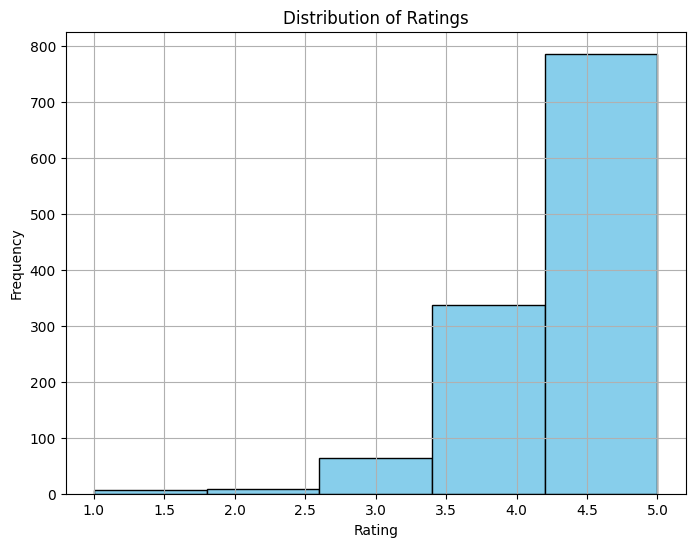

In [ ]:
#Histogram of 'rating':
plt.figure(figsize=(8, 6))
plt.hist(df['rating'], bins=5, color='skyblue', edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

*Observation* : The distribution of ratings is skewed towards the higher end, with the highest frequency of ratings in the 4.5 to 5 range. Very few ratings are below 3.

*Inference* : The overall customer satisfaction is high, as indicated by the large number of high ratings. The product quality is well-regarded by the majority of customers.

<ipython-input-17-8f3bf6b88926>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beats_reviews['label'] = 'Beats'
<ipython-input-17-8f3bf6b88926>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  competitor_reviews['label'] = 'Competitors'


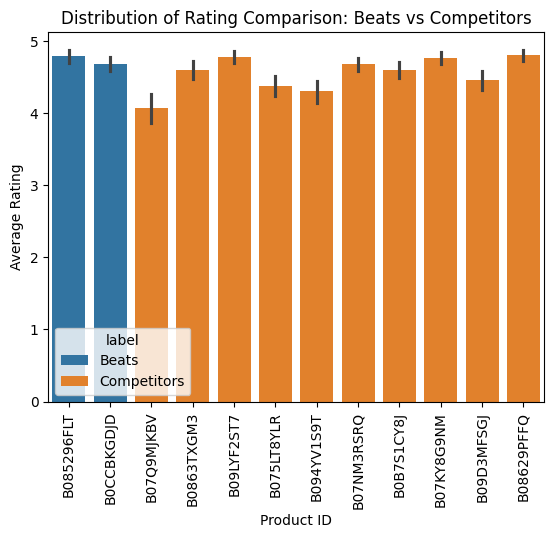

In [ ]:
#Filtering reviews based on product IDs:
beats_reviews = df[df['product_id'].isin(beats_product_ids)]
competitor_reviews = df[~df['product_id'].isin(beats_product_ids)]

# Add a column for labeling
beats_reviews['label'] = 'Beats'
competitor_reviews['label'] = 'Competitors'

# Concatenate the dataframes
all_ratings = pd.concat([beats_reviews, competitor_reviews])

# Plotting
sns.barplot(x='product_id', y='rating', hue='label', data= all_ratings )
plt.title('Distribution of Rating Comparison: Beats vs Competitors')
plt.xlabel('Product ID')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

*Observations* :

- Product ID B08529GFLT (Beats) consistently has high ratings, close to 5.

- Product ID BOCCBKGDID (Beats) shows a lower rating compared to B08529GFLT but still performs relatively well.

- Competitors have a range of ratings, but many products from competitors are also rated highly, with several averaging close to or above 4.

*Inferences* :

- Beats products tend to have high customer satisfaction, especially B08529GFLT.

- Competitors also have strong ratings, indicating that the market for these types of products is highly competitive with generally high satisfaction across the board.

- The lower rating for BOCCBKGDID might indicate specific areas for improvement for this product compared to other Beats products and competitor offerings.


<ipython-input-19-15ba1988d6da>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_attributes', y='rating', data=df, palette='Set2')


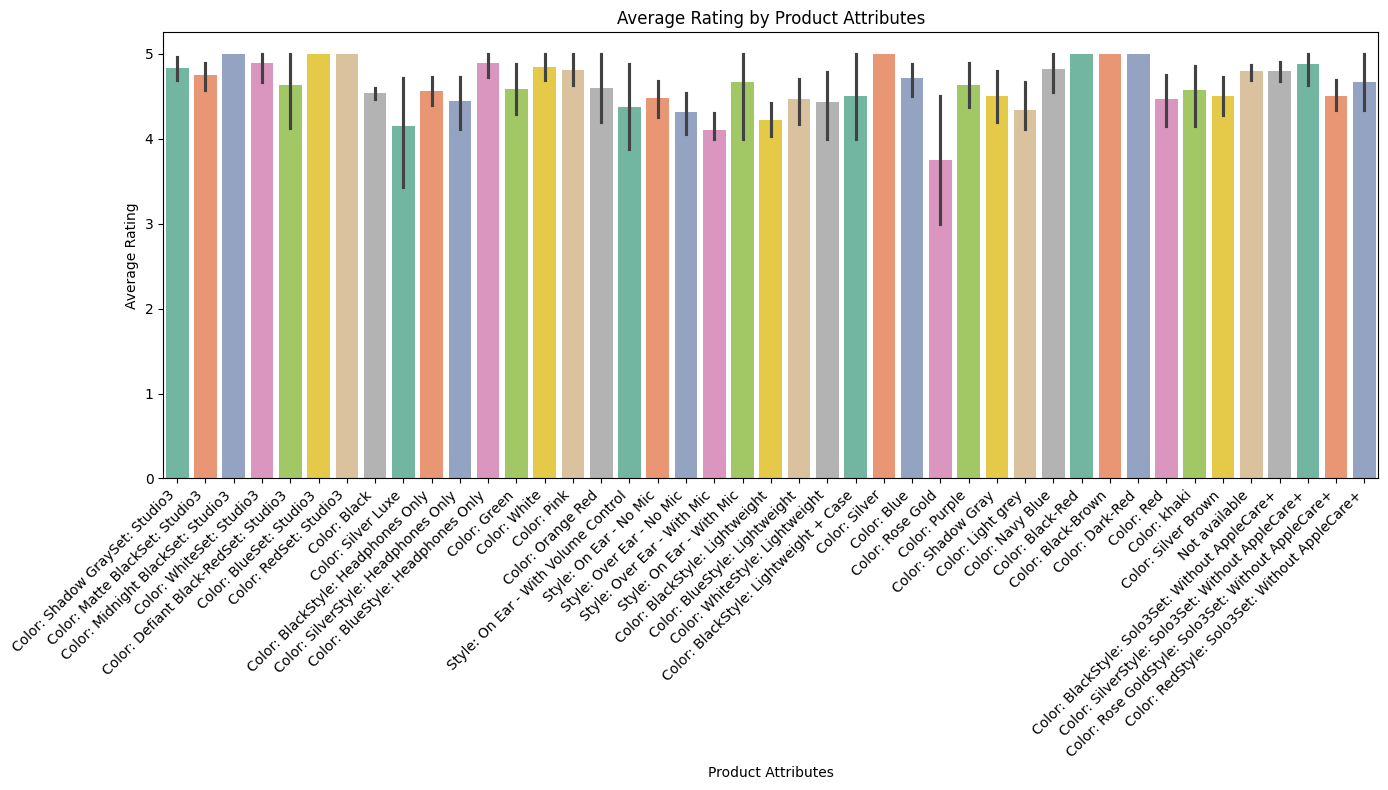

In [ ]:
#Visualizing average rating by product attributes:
plt.figure(figsize=(14, 8))
sns.barplot(x='product_attributes', y='rating', data=df, palette='Set2')
plt.title('Average Rating by Product Attributes')
plt.xlabel('Product Attributes')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

*Observation* : The average rating for most product attributes hovers around 4.5 to 5. There are minor variations, but overall, products have high ratings.

*Inference* : Customers are generally satisfied with the products regardless of the specific attributes. The consistent high ratings suggest a strong overall product quality.

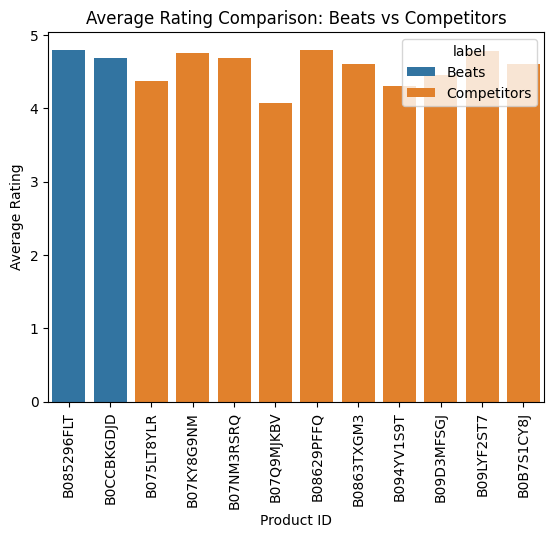

In [ ]:
#Calculating average ratings:
avg_rating_beats = beats_reviews.groupby('product_id')['rating'].mean().reset_index()
avg_rating_competitors = competitor_reviews.groupby('product_id')['rating'].mean().reset_index()

#Adding a column for labeling:
avg_rating_beats['label'] = 'Beats'
avg_rating_competitors['label'] = 'Competitors'

#Concatenating the dataframes:
avg_ratings = pd.concat([avg_rating_beats, avg_rating_competitors])

#Plotting:
sns.barplot(x='product_id', y='rating', hue='label', data=avg_ratings)
plt.title('Average Rating Comparison: Beats vs Competitors')
plt.xlabel('Product ID')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

*Observations* :

- Product ID B08529GFLT (Beats) consistently has high average ratings, close to 5.

- Product ID BOCCBKGDID (Beats) shows a lower average rating compared to B08529GFLT but still performs relatively well.

- Competitors have a range of average ratings, but many products from competitors are also rated highly, with several averaging close to or above 4.

*Inferences* :

- Beats products tend to have high customer satisfaction, especially B08529GFLT.

- Competitors also have strong ratings, indicating that the market for these types of products is highly competitive with generally high satisfaction across the board.

- The lower rating for BOCCBKGDID might indicate specific areas for improvement for this product compared to other Beats products and competitor offerings.

<ipython-input-22-8ee3374ddb49>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
<ipython-input-22-8ee3374ddb49>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)


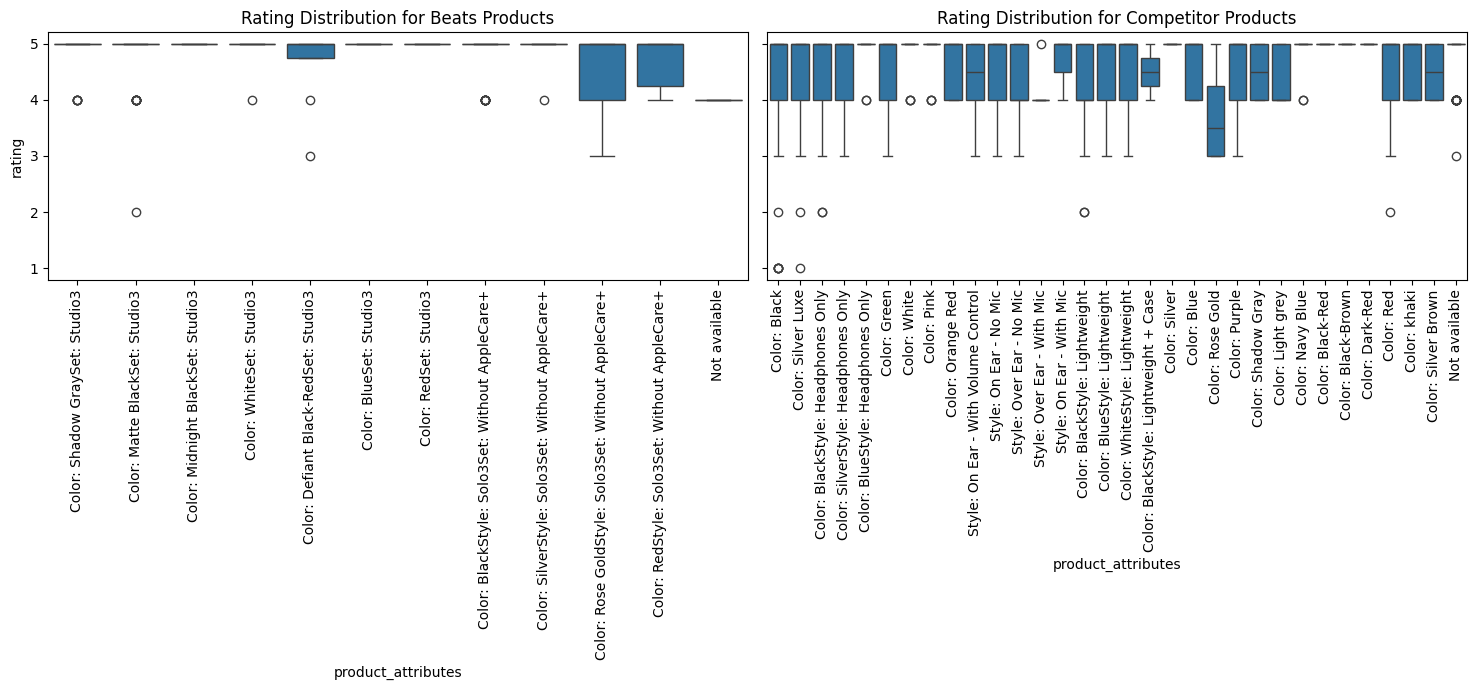

In [ ]:
#Creating subplots:
fig, axes = plt.subplots(1, 2, figsize=(15, 7), sharey=True)

#Plotting the rating distribution for Beats products:
sns.boxplot(ax=axes[0], x='product_attributes', y='rating', data=beats_reviews)
axes[0].set_title('Rating Distribution for Beats Products')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

#Plotting the rating distribution for competitor products:
sns.boxplot(ax=axes[1], x='product_attributes', y='rating', data=competitor_reviews)
axes[1].set_title('Rating Distribution for Competitor Products')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

*Observations* :

- Beats products show a concentrated range of high ratings with minimal outliers.

- Competitor products display a wider distribution of ratings, with several products having more variation and more outliers.

*Inferences* :

- Beats products generally receive consistent high ratings, suggesting strong overall performance and customer satisfaction.

- Competitors have more variability in their ratings, which could indicate a broader range of product quality or customer experiences.

- The lack of significant outliers in Beats products suggests that there are fewer instances of extremely low ratings, which is a positive indicator for product reliability and performance.

<ipython-input-27-17120547f586>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='product_attributes', y='helpful_count', data=df, palette='Set3')


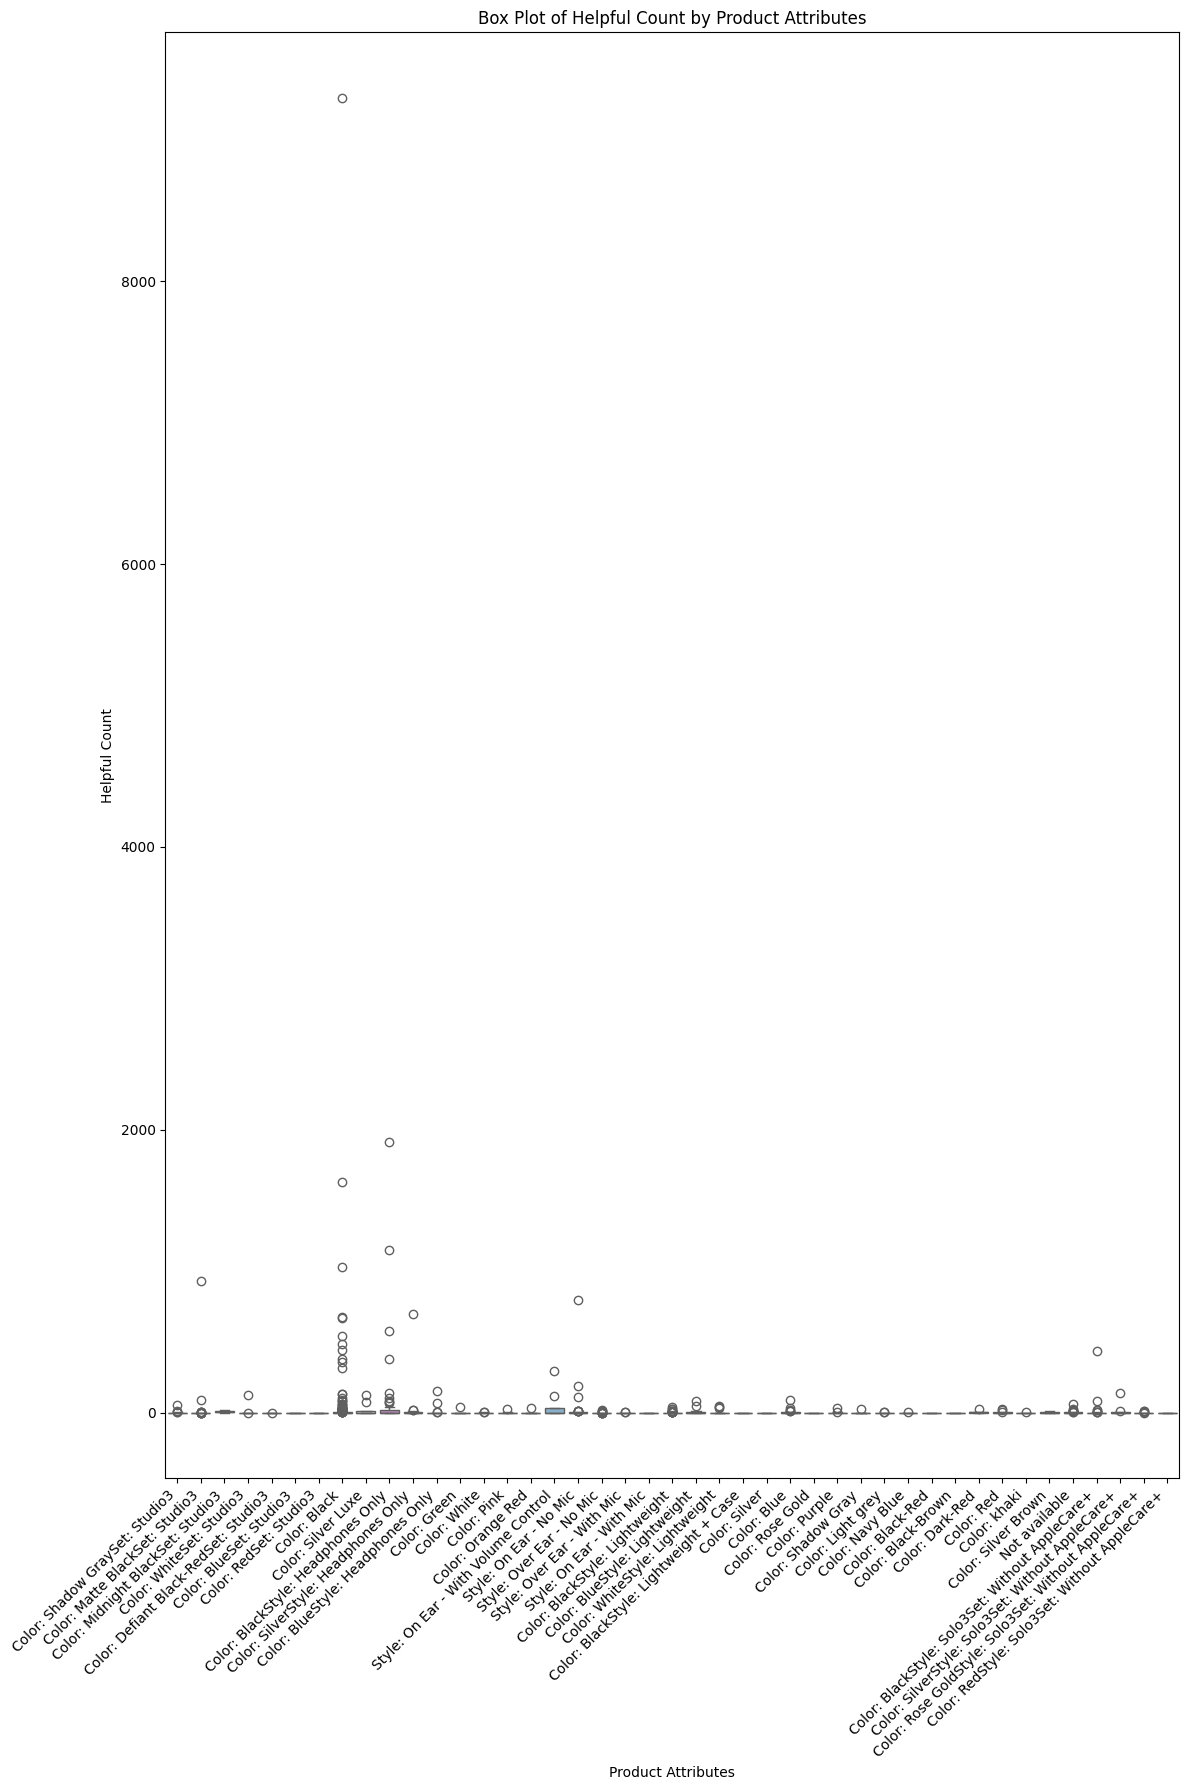

In [ ]:
#Visualizing helpful count by product attributes:
plt.figure(figsize=(12, 18))
sns.boxplot(x='product_attributes', y='helpful_count', data=df, palette='Set3')
plt.title('Box Plot of Helpful Count by Product Attributes')
plt.xlabel('Product Attributes')
plt.ylabel('Helpful Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

*Observation* : Most product attributes have a low count of helpful votes, but there are a few outliers with very high counts, reaching up to 8000.

*Inference* : While most reviews do not receive a significant number of helpful votes, certain products or reviews stand out and receive a large number of helpful votes. This could be due to highly useful or detailed reviews for those specific attributes.

<ipython-input-23-b3bdbc140313>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
<ipython-input-23-b3bdbc140313>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)


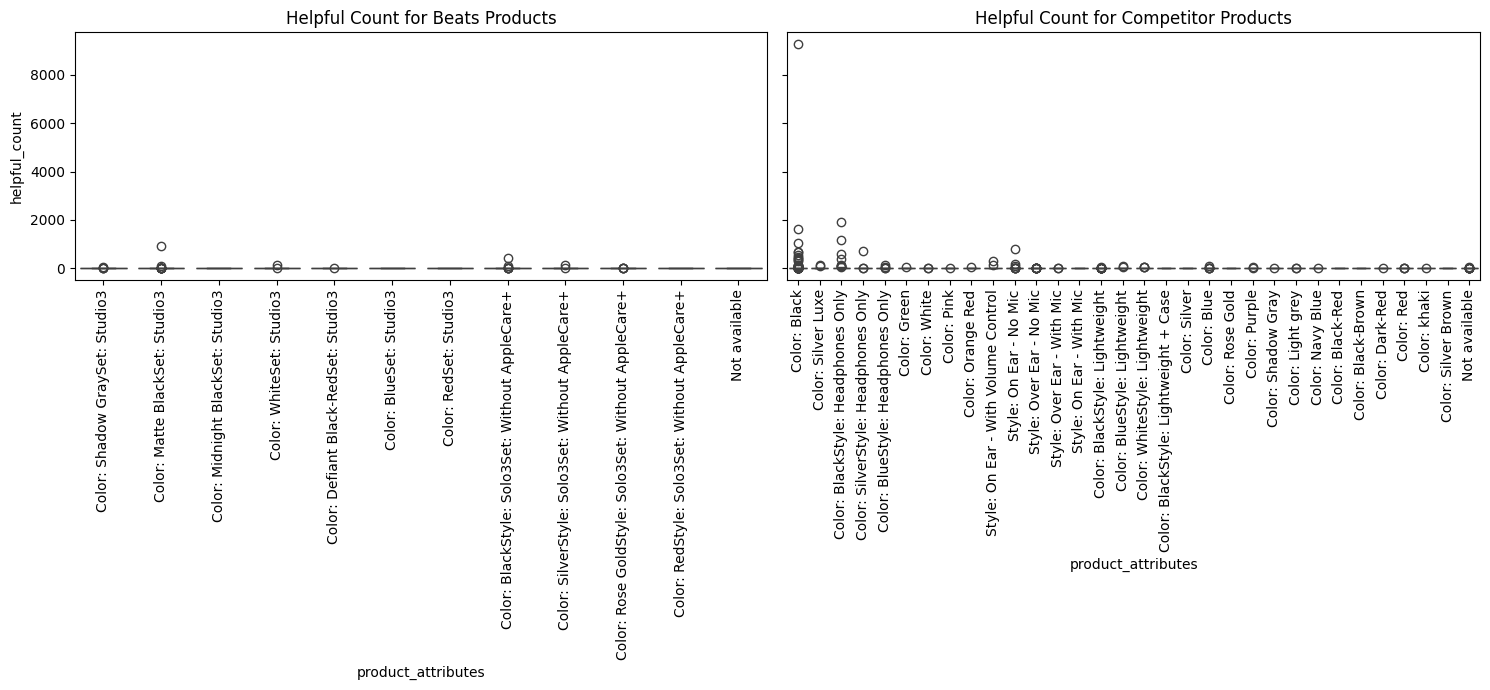

In [ ]:
#Plotting subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 7), sharey=True)

#Plotting Box plot for Beats products:
sns.boxplot(ax=axes[0], x='product_attributes', y='helpful_count', data=beats_reviews)
axes[0].set_title('Helpful Count for Beats Products')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

#Plotting a  Box plot for competitor products:
sns.boxplot(ax=axes[1], x='product_attributes', y='helpful_count', data=competitor_reviews)
axes[1].set_title('Helpful Count for Competitor Products')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

*Observation* :
- Most of the product attributes have a low helpful count.

- A few product attributes have extremely high outlier helpful counts, with some reviews having helpful counts reaching up to 8500.

*Inference* :

- The majority of the reviews are not marked as very helpful.

- Certain product attributes tend to receive significantly more helpful votes, indicating that some products might be more engaging or have more detailed reviews.


<ipython-input-30-6e8835e8ca7b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='product_attributes', data=df, palette='Set1')


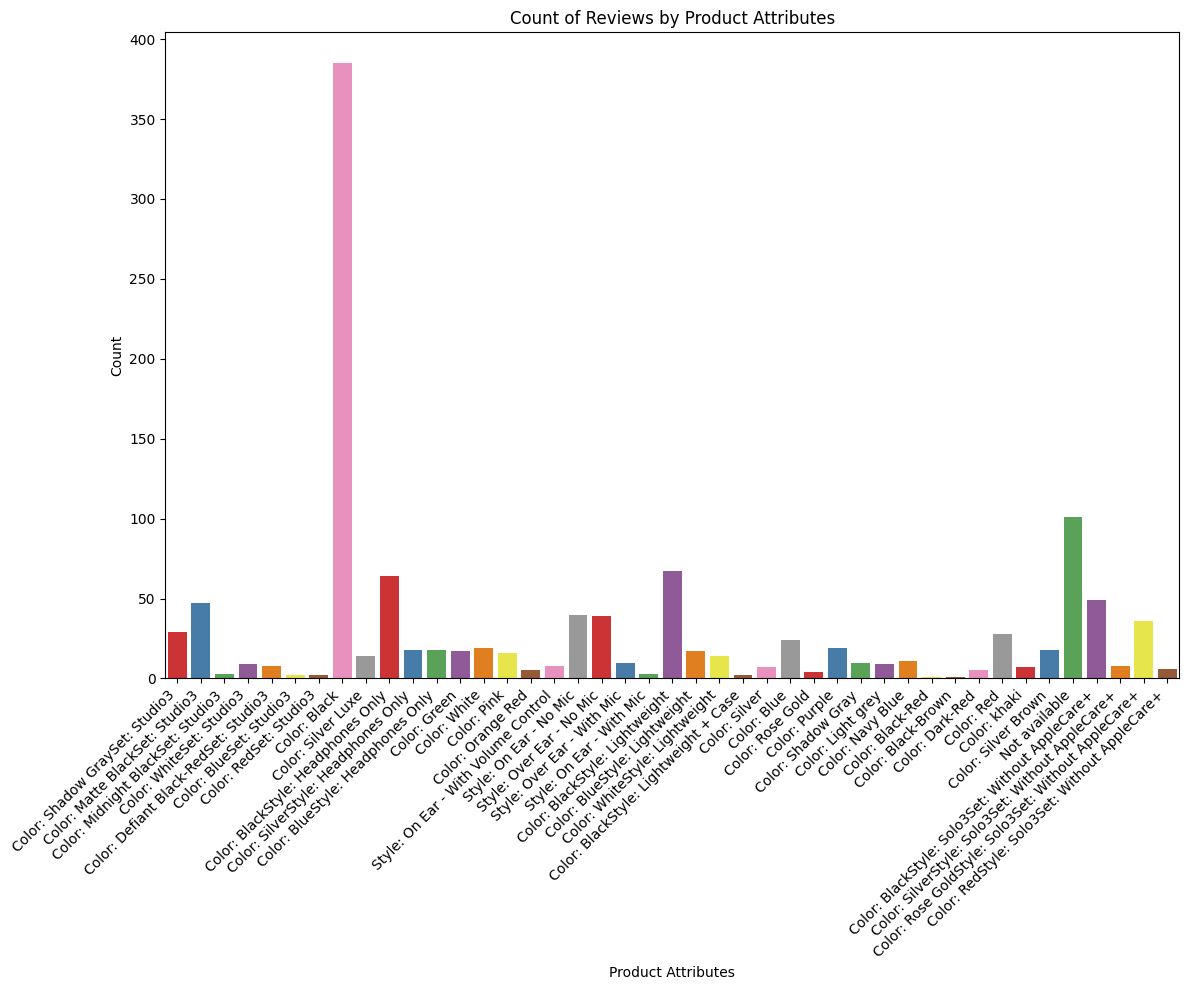

In [ ]:
#Visualizing count of reviews by product attributes:
plt.figure(figsize=(12, 10))
sns.countplot(x='product_attributes', data=df, palette='Set1')
plt.title('Count of Reviews by Product Attributes')
plt.xlabel('Product Attributes')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

*Observation* :

- The count of reviews varies widely across different product attributes.

- One particular product attribute, i.e Black color in headphones, has an exceptionally high number of reviews, close to 400.

- Many product attributes have relatively few reviews, often less than 50.

*Inference* :

- Some product attributes are more popular or have been reviewed more frequently than others.

- The high number of reviews for certain attributes might indicate a higher sales volume or popularity of those products.

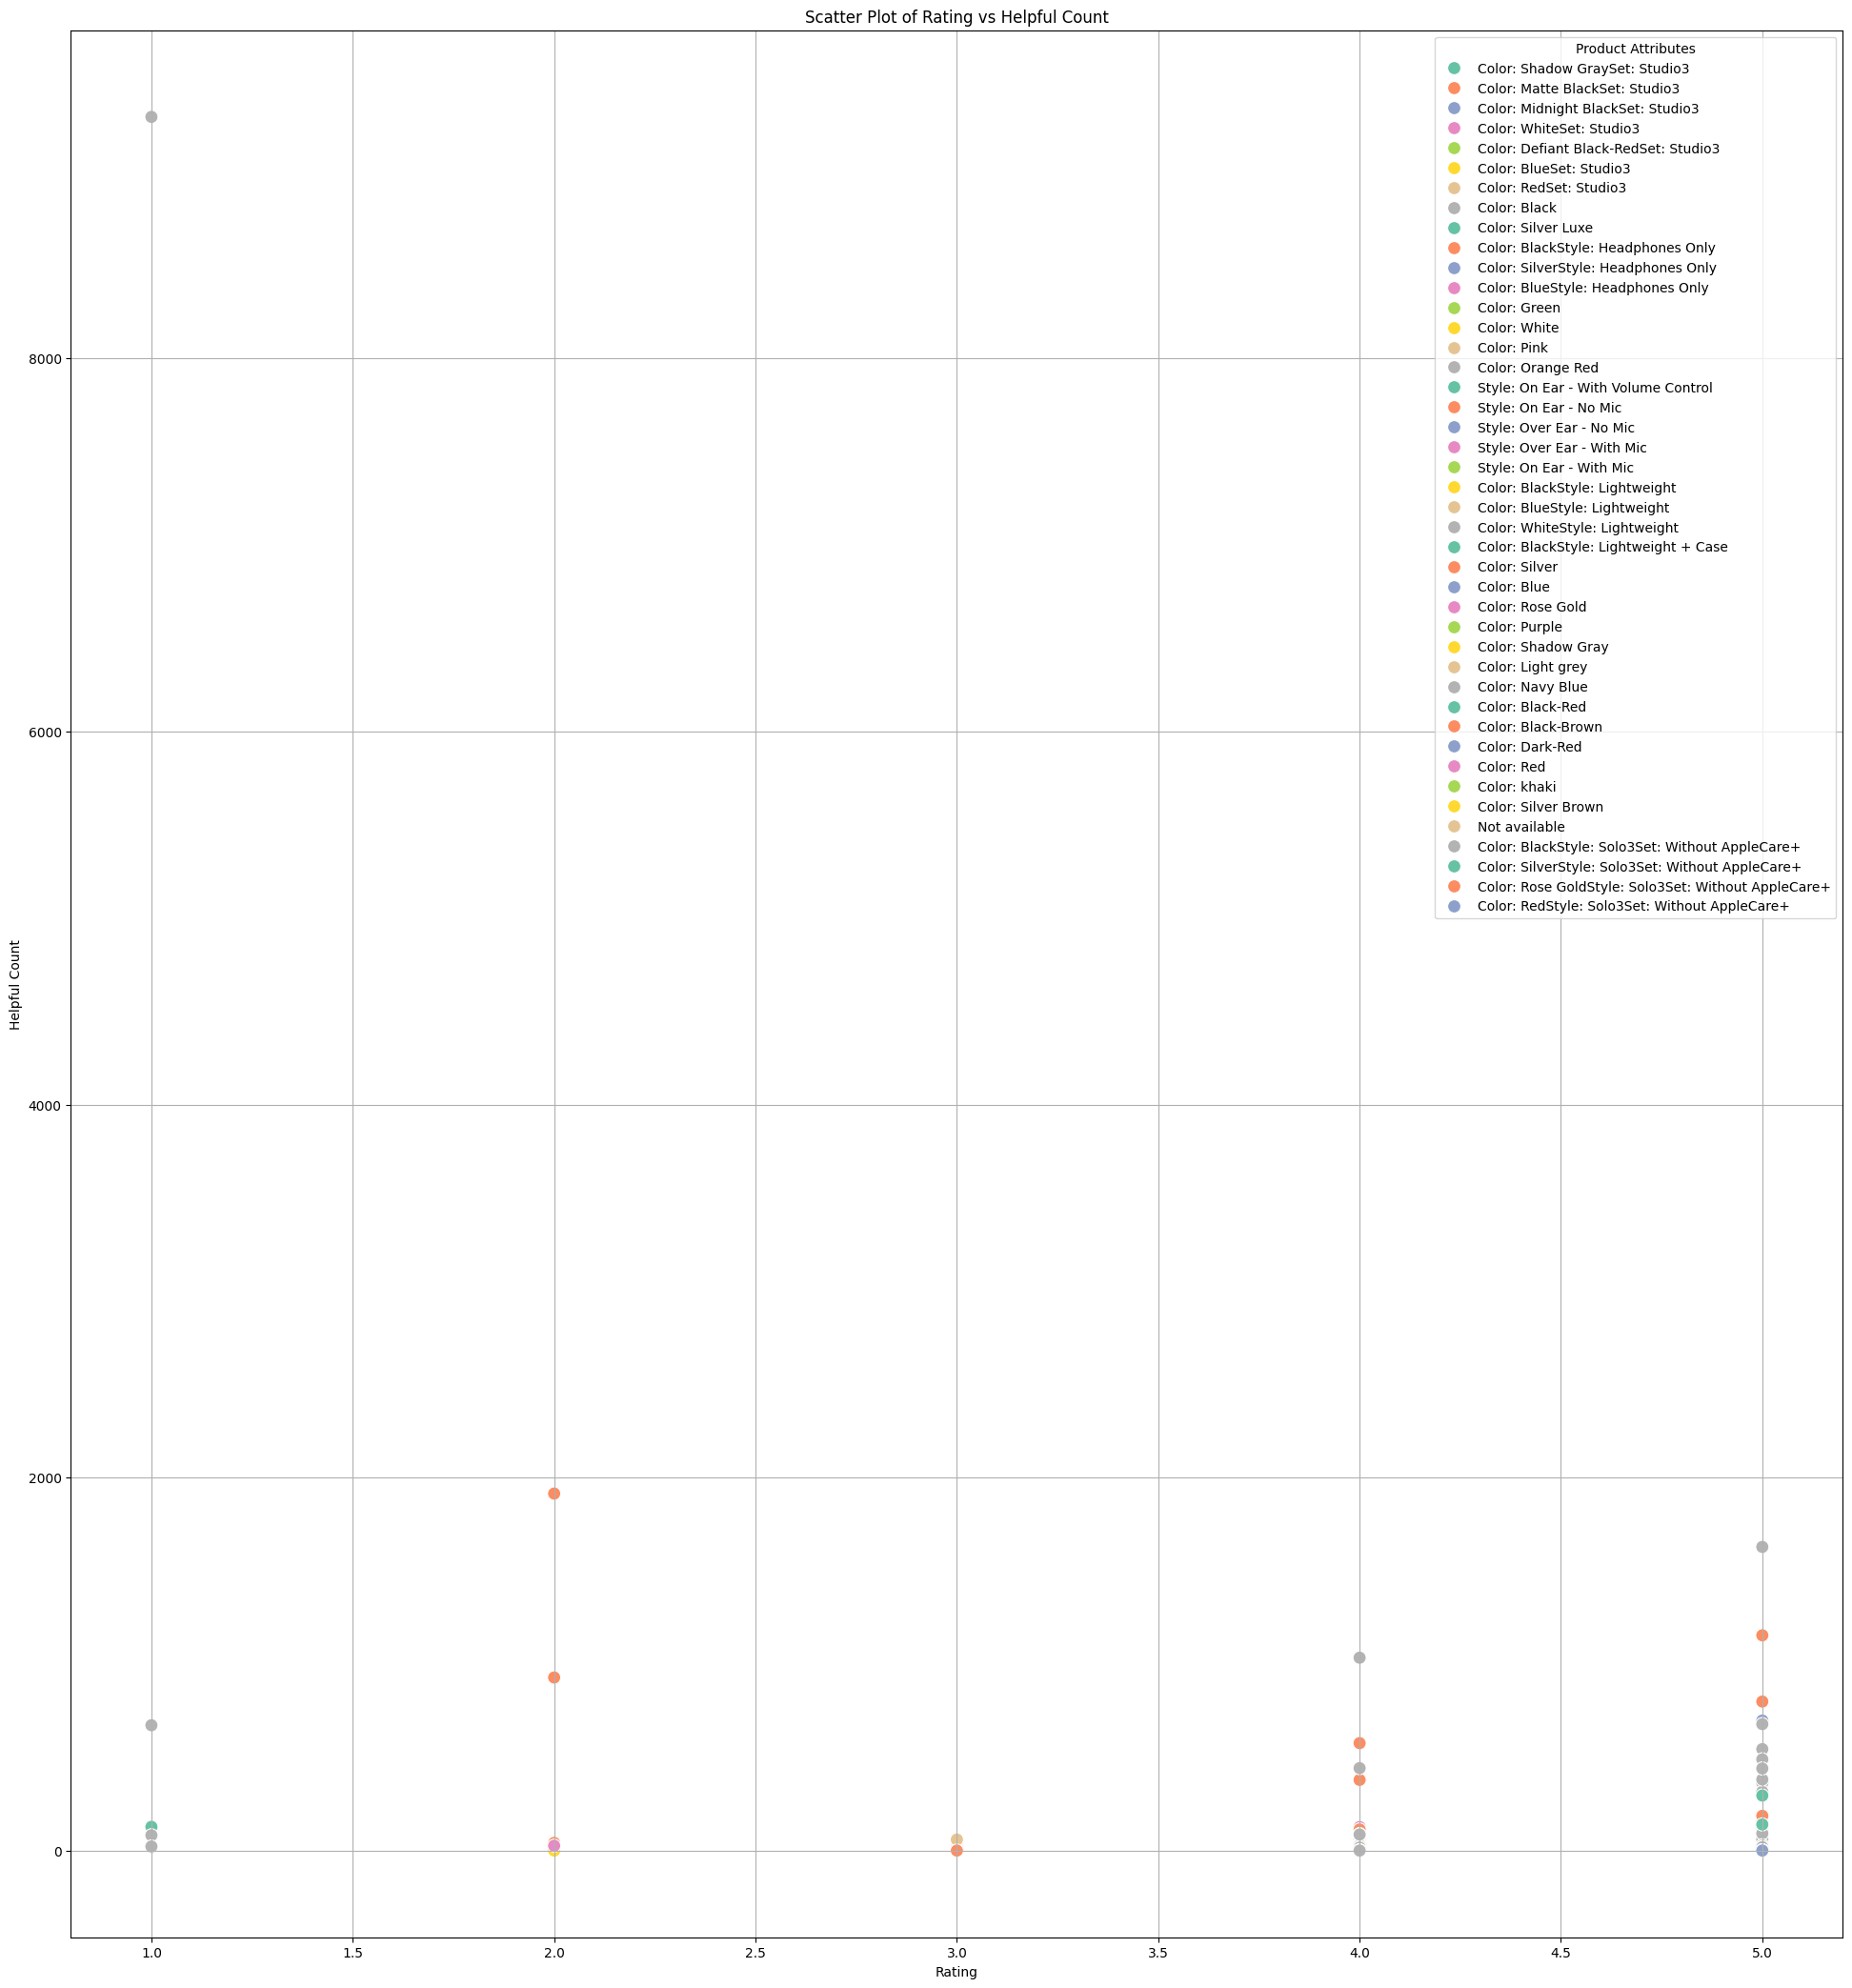

In [ ]:
#Plotting a Scatter plot of 'rating' vs 'helpful_count':
plt.figure(figsize=(24, 26))
sns.scatterplot(x='rating', y='helpful_count', data=df, hue='product_attributes', palette='Set2', s=100)
plt.title('Scatter Plot of Rating vs Helpful Count')
plt.xlabel('Rating')
plt.ylabel('Helpful Count')
plt.legend(title='Product Attributes')
plt.grid(True)
plt.show()

*Observation* :

- Reviews with lower ratings (1.0 to 2.0) generally have fewer helpful votes, though there are a few exceptions with very high helpful counts.

- Reviews with higher ratings (4.0 to 5.0) also have varying helpful counts, but there's a higher concentration of reviews with lower helpful counts.

- A notable outlier with a very high helpful count (over 8000) is present at a lower rating.

*Inference* :

- There is no clear correlation between the rating of a review and the helpful count.

- Reviews with extreme helpful counts might be outliers and could be influenced by factors other than just the rating.

# <span style="font-size:40pt"><b>Correlation Analysis</b></span>

In [ ]:
#Calculating point biserial correlation coefficient between 'rating' and 'helpful_count'
correlation_coefficient, p_value = pointbiserialr(df['rating'], df['helpful_count'])

print(f"Point Biserial Correlation Coefficient: {correlation_coefficient:.4f}")
print(f"P-value: {p_value:.4f}")

Point Biserial Correlation Coefficient: -0.1813
P-value: 0.0000


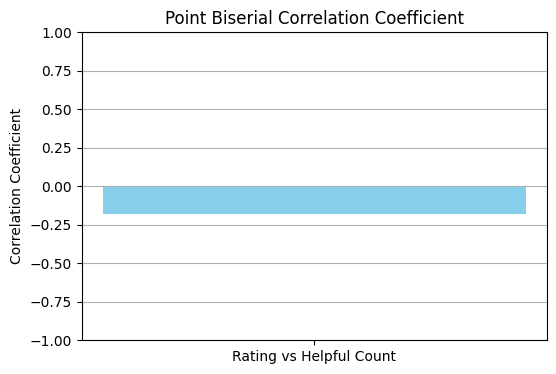

In [ ]:
# Plotting the correlation coefficient
plt.figure(figsize=(6, 4))
plt.bar(['Rating vs Helpful Count'], [correlation_coefficient], color='skyblue')
plt.title('Point Biserial Correlation Coefficient')
plt.ylabel('Correlation Coefficient')
plt.ylim(-1, 1)  # Set y-axis range from -1 to 1 for correlation coefficient
plt.grid(axis='y')
plt.show()

*Interpretation of Point Bi-serial Correlation Analysis* :

- The negative correlation coefficient (-0.1813) suggests a weak negative linear relationship between rating and helpful_count. As rating increases, helpful_count tends to decrease slightly.

- The very low p-value (0.0000) indicates that this observed negative correlation is unlikely to be due to random sampling variability, providing strong evidence that there is indeed a relationship between rating and helpful_count.

In summary, these results suggest that there is a statistically significant, albeit weak, negative linear relationship between rating and helpful_count in this dataset.

In [ ]:
beats_reviews = df[df['product_id'].isin(beats_product_ids)]
competitor_reviews = df[~df['product_id'].isin(beats_product_ids)]

#Calculating point biserial correlation coefficient between 'rating' and 'helpful_count' for Beats products
correlation_coefficient, p_value = pointbiserialr(beats_reviews['rating'], beats_reviews['helpful_count'])

print(f"Point Biserial Correlation Coefficient for Beats Products: {correlation_coefficient:.4f}")
print(f"P-value: {p_value:.4f}")

Point Biserial Correlation Coefficient for Beats Products: -0.3641
P-value: 0.0000


In [ ]:
beats_reviews = df[df['product_id'].isin(beats_product_ids)]
competitor_reviews = df[~df['product_id'].isin(beats_product_ids)]

#Calculating point biserial correlation coefficient between 'rating' and 'helpful_count' for competitor products
correlation_coefficient, p_value = pointbiserialr(competitor_reviews['rating'], competitor_reviews['helpful_count'])

print(f"Point Biserial Correlation Coefficient for Beats Products: {correlation_coefficient:.4f}")
print(f"P-value: {p_value:.4f}")

Point Biserial Correlation Coefficient for Beats Products: -0.1778
P-value: 0.0000


*Interpretation* :

Point Biserial Correlation Coefficient (-0.3641 and -0.1778):

- The negative sign (-) indicates a negative correlation between rating and helpful_count for Beats products.

- -0.3641: This coefficient suggests a moderate negative linear relationship between rating and helpful_count for Beats products. As rating increases, helpful_count tends to decrease (or vice versa) moderately.

- -0.1778: This coefficient indicates a weaker negative linear relationship compared to the first coefficient. As rating increases, helpful_count tends to decrease (or vice versa) to a lesser extent.

P-value (0.0000):

- The p-value associated with each correlation coefficient is very close to zero.

- A p-value of 0.0000 indicates strong evidence against the null hypothesis (no correlation), suggesting that the observed negative correlations are statistically significant.

Summary:

- These results imply that for Beats products in your dataset:

- There exists a statistically significant negative relationship between rating and helpful_count.

- The strength of this negative relationship varies, with one coefficient indicating a moderate negative correlation and the other indicating a weaker negative correlation.

# <span style="font-size:40pt"><b>Sentiment Analysis using TextBlob</b></span>

In [ ]:
#Defining a function to perform sentiment analysis using TextBlob:
def analyze_sentiment(text):
    """
    Perform sentiment analysis on a text using TextBlob.

    Parameters:
    text (str): The input text.

    Returns:
    str: 'positive', 'negative', or 'neutral' based on sentiment analysis.
    """
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

#Applying sentiment analysis to each review in 'content' column:
df['sentiment'] = df['content'].apply(analyze_sentiment)

In [ ]:
#Aggregating sentiment scores to assess overall consumer sentiment:
sentiment_counts = df['sentiment'].value_counts()
print("Sentiment Counts:")
print(sentiment_counts)

# Calculate sentiment proportions
total_reviews = df.shape[0]
sentiment_proportions = sentiment_counts / total_reviews * 100
print("\nSentiment Proportions (%):")
print(sentiment_proportions)

Sentiment Counts:
sentiment
positive    1112
neutral       53
negative      35
Name: count, dtype: int64

Sentiment Proportions (%):
sentiment
positive    92.666667
neutral      4.416667
negative     2.916667
Name: count, dtype: float64


<ipython-input-28-a29640b7761f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='Set2')


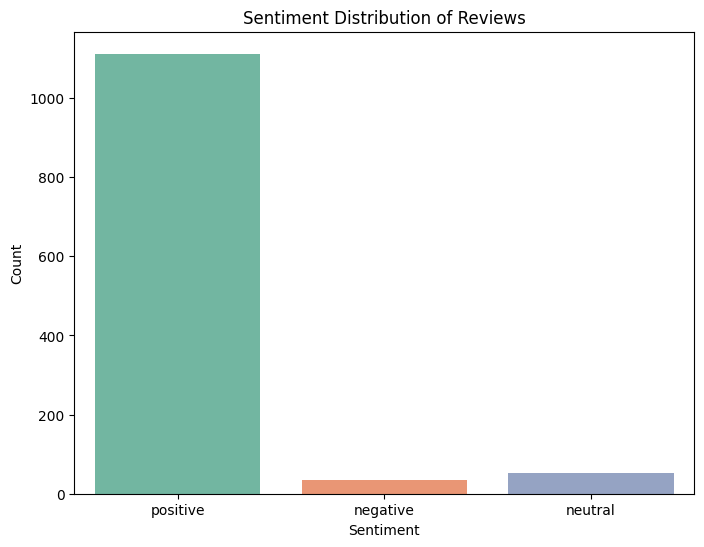

In [ ]:
#Visualizing/Plotting sentiment distribution:
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df, palette='Set2')
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

*Observation* :

- The vast majority of reviews are positive. There are very few negative reviews and neutral reviews are present but they too, are far fewer than positive reviews.

*Inference* :

- The product or service being reviewed is generally well-received by users.

- High satisfaction levels could indicate good quality, effective marketing, or excellent customer service.

- The product or service has few detractors, which may suggest consistent quality or effective issue resolution practices.

In [ ]:
#Segmenting the dataframe into Beats products and competitor products:
beats_reviews = df[df['product_id'].isin(beats_product_ids)]
competitor_reviews = df[~df['product_id'].isin(beats_product_ids)]

#Aggregating sentiment scores to assess overall consumer sentiment for Beats products:
beats_sentiment_counts = beats_reviews['sentiment'].value_counts()
beats_total_reviews = beats_reviews.shape[0]
beats_sentiment_proportions = beats_sentiment_counts / beats_total_reviews * 100

#Aggregating sentiment scores to assess overall consumer sentiment for Competitor products:
competitor_sentiment_counts = competitor_reviews['sentiment'].value_counts()
competitor_total_reviews = competitor_reviews.shape[0]
competitor_sentiment_proportions = competitor_sentiment_counts / competitor_total_reviews * 100

#Printing sentiment counts and proportions for Beats:
print("Beats Sentiment Counts:")
print(beats_sentiment_counts)
print("\nBeats Sentiment Proportions (%):")
print(beats_sentiment_proportions)

#Printing sentiment counts and proportions for Competitors:
print("\nCompetitor Sentiment Counts:")
print(competitor_sentiment_counts)
print("\nCompetitor Sentiment Proportions (%):")
print(competitor_sentiment_proportions)


Beats Sentiment Counts:
sentiment
positive    173
neutral      18
negative      9
Name: count, dtype: int64

Beats Sentiment Proportions (%):
sentiment
positive    86.5
neutral      9.0
negative     4.5
Name: count, dtype: float64

Competitor Sentiment Counts:
sentiment
positive    939
neutral      35
negative     26
Name: count, dtype: int64

Competitor Sentiment Proportions (%):
sentiment
positive    93.9
neutral      3.5
negative     2.6
Name: count, dtype: float64


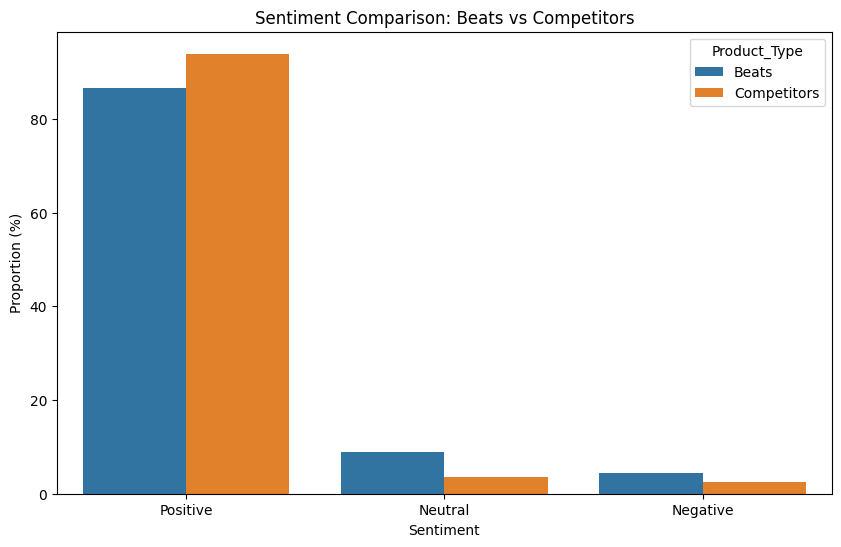

In [ ]:
#Combining sentiment proportions into a single dataframe for plotting:
sentiment_comparison = pd.DataFrame({
    'Sentiment': ['Positive', 'Neutral', 'Negative'],
    'Beats': [beats_sentiment_proportions.get('positive', 0),
              beats_sentiment_proportions.get('neutral', 0),
              beats_sentiment_proportions.get('negative', 0)],
    'Competitors': [competitor_sentiment_proportions.get('positive', 0),
                    competitor_sentiment_proportions.get('neutral', 0),
                    competitor_sentiment_proportions.get('negative', 0)]
})

#Plotting sentiment comparison:
sentiment_comparison_melted = sentiment_comparison.melt(id_vars='Sentiment', var_name='Product_Type', value_name='Proportion')

plt.figure(figsize=(10, 6))
sns.barplot(x='Sentiment', y='Proportion', hue='Product_Type', data=sentiment_comparison_melted)
plt.title('Sentiment Comparison: Beats vs Competitors')
plt.ylabel('Proportion (%)')
plt.show()

*Observation* :

- Both Beats and its competitors have a high proportion of positive reviews, with competitors having a slightly higher percentage.

- Beats has a higher percentage of neutral reviews compared to its competitors.

- Both Beats and its competitors have a low percentage of negative reviews, with Beats having a slightly higher percentage.

*Inference* :

- Both Beats and its competitors are generally well-regarded by customers. The slightly higher positive sentiment for competitors might suggest they are marginally preferred or have certain features that users appreciate more.

- Beats may have more users who are indifferent or have a balanced view of the product. This could suggest variability in user experiences or unmet expectations in certain aspects of the product.

- While negative sentiment is low overall, Beats may have slightly more areas where users are dissatisfied compared to its competitors. Identifying and addressing these areas could help improve overall user satisfaction.

# <span style="font-size:40pt"><b>Conclusion</b></span>

Based on the comprehensive analysis of the dataset, here are the summarized findings, insights, and potential implications for Beats by Dre:

1. **Overall Customer Satisfaction**:
   - The majority of ratings are high (4.5 to 5), indicating widespread customer satisfaction across both Beats products and competitors.
   - Implication: Beats enjoys a strong reputation for product quality and customer satisfaction, aligning with its premium brand positioning.

2. **Performance of Beats Products**:
   - Specific Beats products like B08529GFLT consistently receive very high ratings close to 5.
   - BOCCBKGDID, while also rated well, shows comparatively lower ratings within the Beats lineup.
   - Implication: There is a clear variation in customer satisfaction across different Beats products, suggesting areas where improvements or focus might be needed.

3. **Competitive Landscape**:
   - Competitors also receive high ratings, indicating a competitive market with generally high customer satisfaction across the board.
   - Implication: Beats faces strong competition where maintaining high standards and differentiation are crucial for market leadership.

4. **Product Attributes**:
   - Most product attributes receive high average ratings, suggesting consistent quality across various aspects of products.
   - Implication: Continued focus on maintaining high standards across all product attributes is essential for meeting customer expectations.

5. **Helpful Votes and Review Engagement**:
   - While most reviews receive few helpful votes, certain reviews and products stand out with significantly higher engagement.
   - Implication: Encouraging more detailed and useful customer reviews could enhance engagement and provide deeper insights into customer preferences and product satisfaction.

6. **Review Distribution and Sentiment**:
   - Positive reviews overwhelmingly dominate, with few negative or neutral reviews.
   - Implication: The product/service generally enjoys high customer satisfaction, but addressing the concerns raised in negative reviews could further improve overall sentiment and customer retention.

7. **Correlation Analysis (Rating vs. Helpful Count)**:
   - There is a weak negative correlation between rating and helpful_count, indicating that higher-rated reviews tend to receive fewer helpful votes.
   - Implication: Encouraging users to rate and review products more consistently could help balance this relationship, providing more actionable feedback for product improvement.

**Implications for Beats by Dre**:
- **Strengthen Product Line**: Focus on improving lower-rated products like BOCCBKGDID to align with the high satisfaction seen in top-performing products.
- **Competitive Analysis**: Monitor competitor ratings closely to identify trends and areas where Beats can differentiate further.
- **Enhance Customer Engagement**: Encourage more detailed and helpful reviews to increase engagement and improve understanding of customer needs.
- **Address Review Disparities**: Investigate reasons behind disparities in helpful votes for high-rated reviews to improve feedback utilization.
- **Continuous Improvement**: Maintain high standards across all product attributes and address any identified areas for enhancement to sustain customer satisfaction.

By leveraging these insights, Beats by Dre can aim to further solidify its market position and enhance customer loyalty through targeted improvements and strategic initiatives based on customer feedback and competitive analysis.



